In [84]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib

## Loading and Preparing the Data
Load the **handwritten digit dataset** (MNIST dataset).  
The data is split into training and testing sets


In [85]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

y = data["label"]
X = data.drop("label", axis=1)

print(X.shape)
input_shape = X.shape[1]

X_train, X_val, y_train, y_val = train_test_split(X,y, stratify=y, train_size=0.75)

(42000, 784)


## Building the Neural Network Model
Define a simple  neural network using Keras’ Sequential model.  
The model includes:
- Input layer (flattened 28×28 image, shape of 784)
- 3 hidden layers with ReLU activation
- Output layer of 10

#### compile the model 
- **Loss:** `categorical_crossentropy` 
- **Optimizer:** `adam`
- **Metrics:** `accuracy` 


In [ ]:
model = keras.Sequential([
    layers.Input(shape=[input_shape]),
    layers.BatchNormalization(),

    layers.Dense(784, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(784, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.Dense(784, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),


    layers.Dense(10, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='crossentropy',
    metrics=['binary_accuracy'],
)



## Training Results Summary

The plots show how the model’s **loss** and **accuracy** changed over epochs for both the training and validation data.

### Graph 1 – Loss vs. Epochs
- Ideally, both lines start high and decrease smoothly as training continues.  
- They flatten out near the same point once the model stops improving.  

##### what happened
- the validation loss rises while the training loss continues to decrease, it signals **overfitting**.  
- To address this, you can increase the **dropout rate** or adjust the **density of hidden layers**.


### Graph 2 – Accuracy vs. Epochs
- Ideally, both lines start low.  
- Both increase rapidly, then level off near the top (around 92–99%).  
- The two curves should stay close together, showing the model generalizes well.  

This pattern is displayed over **13 epochs** due to early stopping.


Overall, the neural network achieved about **95.7% accuracy** on unseen data—strong performance for handwritten digit recognition. Further tuning or dropout adjustments could improve results slightly, but the model already performs well.


Best Validation Loss: 0.1576
Best Validation Accuracy: 0.1116


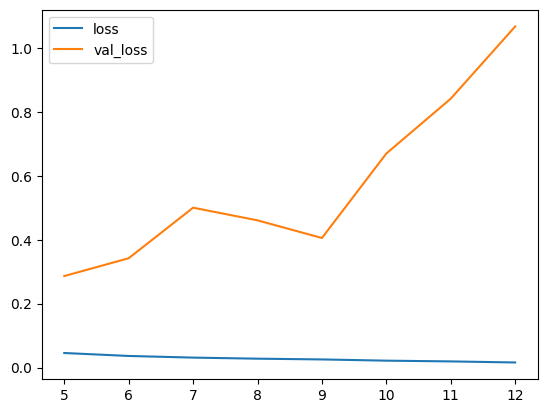

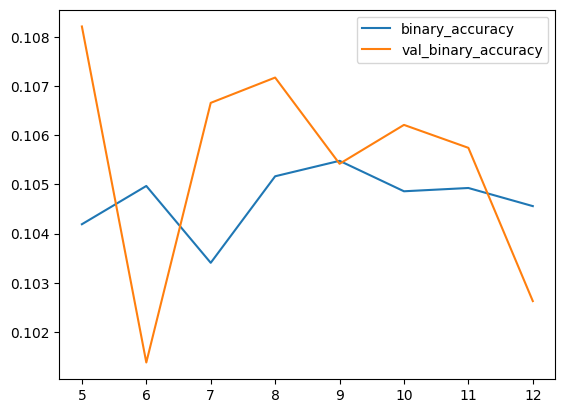

In [87]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=420,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0, # hide output
)

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

#### Evaluating on Test Data
Evaluate the trained model on the test set to measure its final performance on unseen data.  

#### Making Predictions
Use the trained model to predict digits from on unseen images.  

In [82]:
predictions = model.predict(test_data).argmax(axis=1)

predictions_df = pd.DataFrame({
"ImageId": range(1,len(predictions) +1),
"Label": predictions
})

sumbission_file_name = f"submission_{pd.Timestamp.now().strftime('%Y-%m-%d_%H-%M-%S')}.csv"
predictions_df.to_csv(sumbission_file_name, index=False)

# attempt 1: 96.510%
# attempt 2: 96.196%
# attempt 3: 95.575%       ( elu activation) ovefit
# attempt 4: 96.201%          (0.4 dropout rate). graph 1 diverged
# attempt 5: 96.703%          (more basic model smaller hidden layers)
# attempt 6: 96.750%    





875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
